박스 플롯
- axe 객체를 분할하여 2개의 그래프 제작
- 수직 박스 플롯 :vert=True
- 수평 박스 플롯: vert=False


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
'''
히스토그램 그리기
- 데이터 하나의 빈도
- x축을 같은 크기로 나누어 각 구간에 해당하는 데이터 값의 개수 
- plot 함수 사용 
'''
df=pd.read_csv('./auto-mpg.csv',header=None)
col_names=['mpg','cylinders','displacement','horsepower','weight',
           'acceleration','model years','origin','name']
df.columns=col_names


<function matplotlib.pyplot.show(close=None, block=None)>

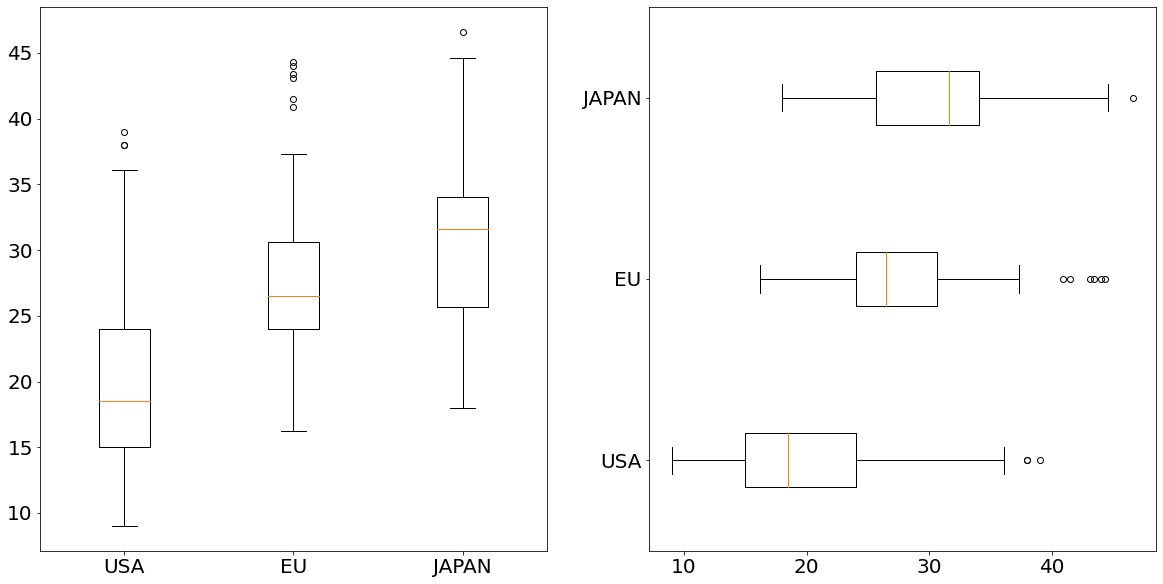

In [6]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
# 제조 국가별 mpg 현황에 대한 박스플롯
# 제조 국가별로 맞는 번호에 맞추 mpg열의 값을 찾아야 한다
#df[['origin'==1]['mpg']] 
#인자(x=조건, labels=[국가이름],박스플롯 종류)
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
              df[df['origin']==2]['mpg'],
              df[df['origin']==3]['mpg']],
            labels=['USA','EU','JAPAN'],
            vert=True)
ax1.tick_params(axis='x',labelsize=20)
ax1.tick_params(axis='y',labelsize=20)
ax2.boxplot(x=[df[df['origin']==1]['mpg'],
              df[df['origin']==2]['mpg'],
              df[df['origin']==3]['mpg']],
            labels=['USA','EU','JAPAN'],
            vert=False)
ax2.tick_params(axis='x',labelsize=20)
ax2.tick_params(axis='y',labelsize=20)
plt.show

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [38]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


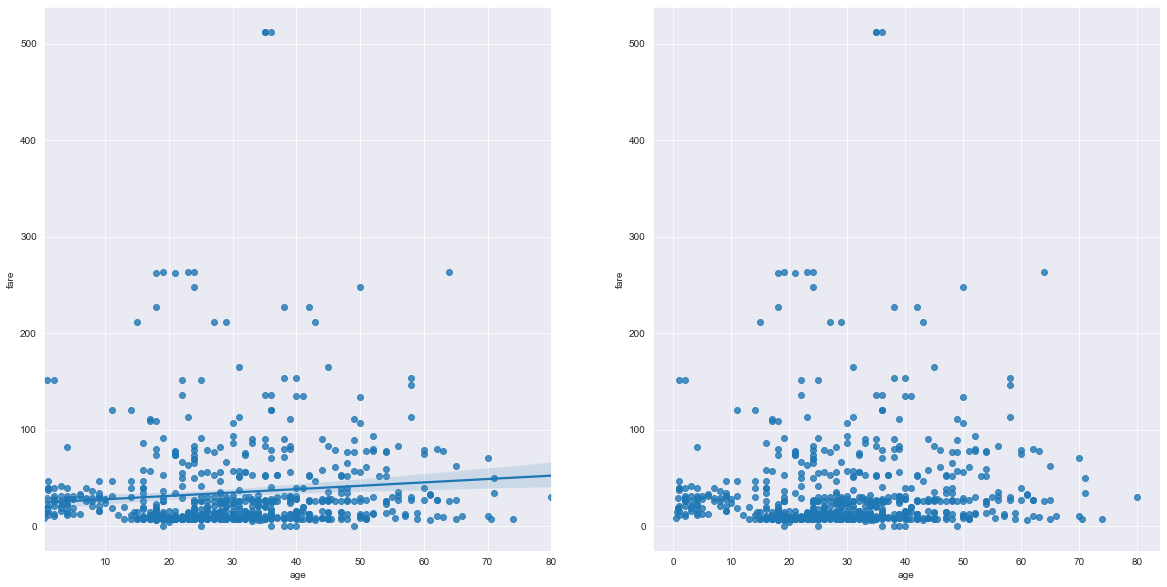

In [59]:
#회귀선이 있는 산점도
#
sns.set_style('darkgrid')
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
sns.regplot(x='age',y='fare',data=titanic,ax=ax1,fit_reg=True)
sns.regplot(x='age',y='fare',data=titanic,ax=ax2,fit_reg=False)
plt.show()

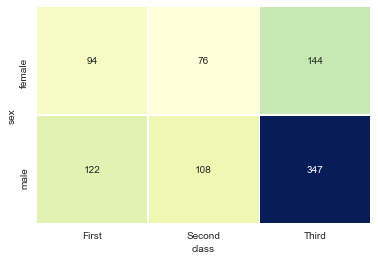

In [70]:
# 히트맵 그리기
'''
x축 항목과 y축 항목에 해당하는 개수를 세서 값을 측정해놓는것
- table 객체 생성하기
- 데이터셋에 pivot_table함수를 사용
- 인자(index,columns,aggfunc)
- x축: 'sex'
- y축: 'class'
- aggfunc(집계)='size'
'''
table=titanic.pivot_table(index='sex',columns='class',aggfunc='size')
table
#seaborn 모듈의 heatmap 함수 사용
#인자(데이터프레임,데이터 값의 표시 여부,포맷,컬러맵,경계선 굵기, )
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=.5,cbar=False)
plt.show()

Text(0.5, 1.0, 'swarm plot')

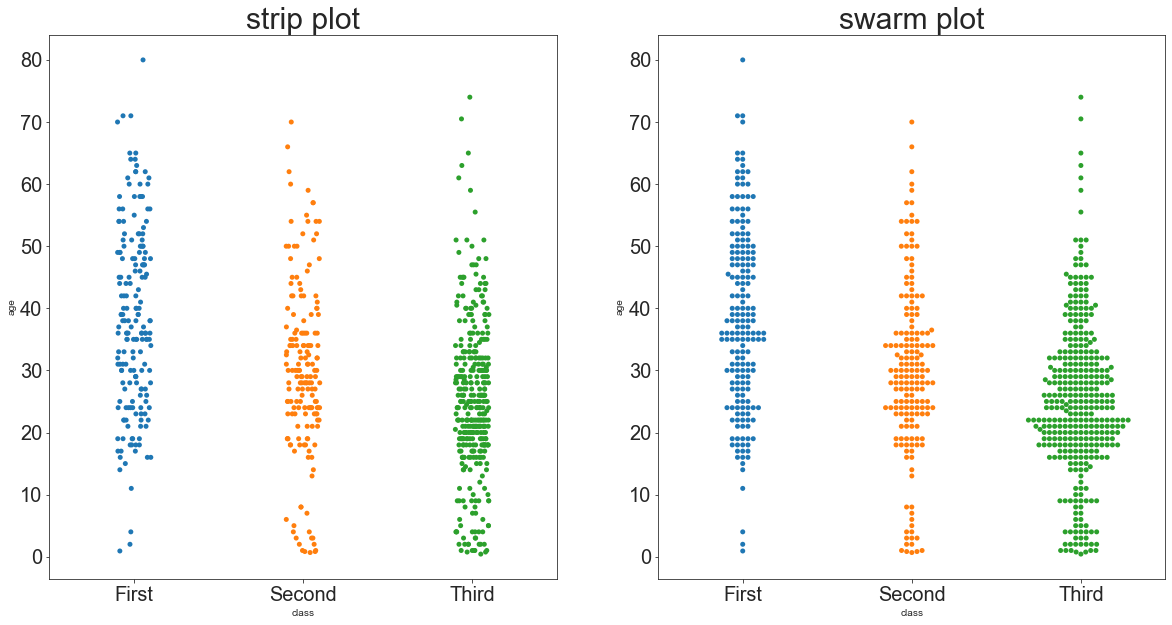

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
titanic=sns.load_dataset('titanic')
titanic.head()
sns.set_style('ticks')
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

#seaborn 객체에서 stripplot함수 사용해보기
#인자(x축,y축,data=)
sns.stripplot(x='class',y='age',data=titanic,ax=ax1)
ax1.tick_params(axis='x',labelsize=20)
ax1.tick_params(axis='y',labelsize=20)

sns.swarmplot(x='class',y='age',data=titanic,ax=ax2)
ax2.tick_params(axis='x',labelsize=20)
ax2.tick_params(axis='y',labelsize=20)
ax1.set_title('strip plot',size=30)
ax2.set_title('swarm plot',size=30)

In [91]:
#지도 만들기
#seoul_map 이란 객체 생성
#follium 모듈의 Map 함수 사용하기
#인자(location=[37.55,126.98],zoom_start=12)
import folium
seoul_map=folium.Map(location=[37.55,126.98],zoom_start=12)
seoul_map.save('서울.html')

seoul_map2=folium.Map(location=[37.55,126.98],zoom_start=12,
                     tiles='stamen Terrain')
seoul_map2.save('서울2.html')

seoul_map3=folium.Map(location=[37.55,126.98],zoom_start=12,
                     tiles='stamen Toner')
seoul_map3.save('서울3.html')

In [84]:
!pip install folium

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
seoul_map=folium.Map(location=[37.55,126.98],zoom_start=12)
seoul_map.save('서울.html')
#지도 마커 표시 
#학교 위치를 dataframe에 담기
#엑셀 파일에 담기 
df=pd.read_excel('서울지역 대학교 위치.xlsx',index_col=0)
#for문 사용하기
#데이터프레임에서 가져올 변수 생성 name,lat,long
#zip으로 묶어주기
#folium 모듈의 Marker 함수 사용([위도,경도],popup=name)
#Marker 뒤에 add_tp 함수 인자(지도객체)
#저장(seoul_colleges.html)
name=list(df.index)
lat=[]
long=[]
for i in range(len(df)):
    lat.append(df.iloc[i,0])
    long.append(df.iloc[i,1])
    folium.Marker([lat[i],long[i]],popup= name[i]).add_to(seoul_map)

seoul_map.save('서울.html')

ModuleNotFoundError: No module named 'folium'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
seoul_map=folium.Map(location=[37.55,126.98],zoom_start=12)
seoul_map.save('서울.html')
#지도 마커 표시 
#학교 위치를 dataframe에 담기
#엑셀 파일에 담기 
df=pd.read_excel('서울지역 대학교 위치.xlsx',index_col=0)
#for문 사용하기
#데이터프레임에서 가져올 변수 생성 name,lat,long
#zip으로 묶어주기
#folium 모듈의 Marker 함수 사용([위도,경도],popup=name)
#Marker 뒤에 add_tp 함수 인자(지도객체)
#저장(seoul_colleges.html)
name=list(df.index)
lat=[]
long=[]
for i in range(len(df)):
    lat.append(df.iloc[i,0])
    long.append(df.iloc[i,1])
    folium.CircleMarker([lat[i],long[i]],popup= name[i],
                       radius=10,color='brown',fill=True,
                        fill_color='coral',fill_opacity=0.7).add_to(seoul_map)

seoul_map.save('인서울대학교들.html')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import json
#연도만 따로
year= '2017'

#경기도 인구 데이터 받아오기
df = pd.read_excel('./경기도인구데이터.xlsx',index_col='구분')
df.columns=df.columns.map(str)
geo_data= json.load(open('./경기도행정구역경계.json',encoding= 'utf-8'))
gyeonggi_map=folium.Map(location=[37.55,126.98],zoom_start=9,
                    tiles='Stamen Terrain')
#folium 모듈의 choropleth 함수 사용
#인자(geo_data,데이터,columns,채울 색, 투명도, 구분선 투명도, 범위지정,
#     key_on=feature.properties.name).add_to(지도객체)

folium.Choropleth(geo_data,df[year],columns=[df.index,df[year]],
                  fill_color='YlOrRd',fill_opacity=0.7,
                  line_opacity=0.3,
                  threshhold_scale=[10000,100000,300000,500000,700000],
                 key_on='feature.properties.name').add_to(gyeonggi_map)
gyeonggi_map.save('경기도_'+year+'.html')